# Flight Fare Prediction

## Data Acquisition

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_excel('Data_Train.xlsx')
print(data.shape)
data.head()

(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


## Data Preprocessing

In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(axis = 0, inplace = True)

In [9]:
data['Day'] = pd.to_datetime(data['Date_of_Journey'], format="%d/%m/%Y").dt.day
data['Month'] = pd.to_datetime(data['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [10]:
data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute

data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [11]:
Duration = data['Duration']
Duration_hour = list()
Duration_min = list()

for duration in Duration:
    x = duration.split(' ')
    if len(x) == 2:
        Duration_hour.append(int(x[0][0:-1]))
        Duration_min.append(int(x[1][0:-1]))
    elif x[0][-1] == 'h':
        Duration_hour.append(int(x[0][0:-1]))
        Duration_min.append(0)
    elif x[0][-1] == 'm':
        Duration_hour.append(0)
        Duration_min.append(int(x[0][0:-1]))
        
data['Duration_hour'] = Duration_hour
data['Duration_min'] = Duration_min

In [12]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

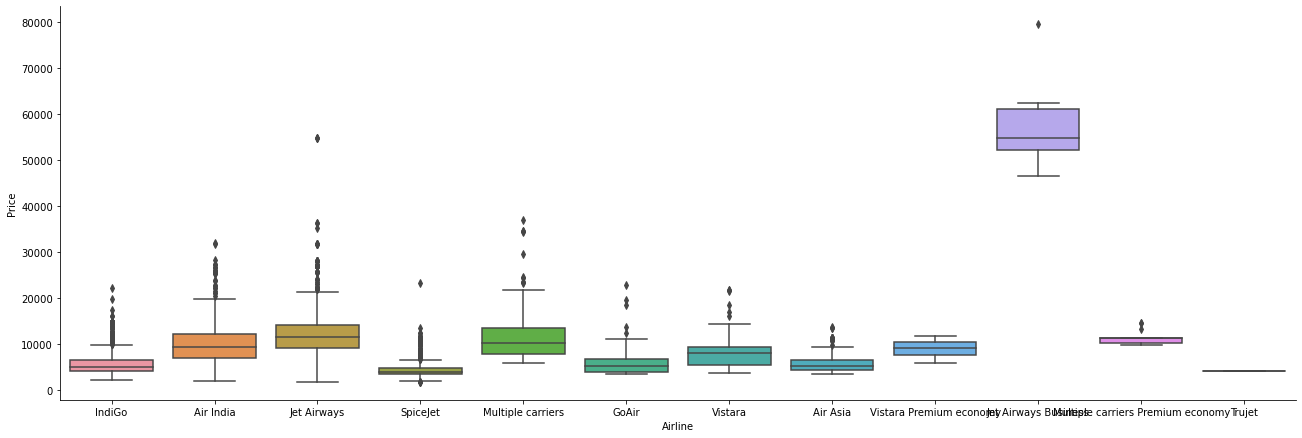

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(y='Price', x='Airline', data=data, kind='box', height=6, aspect=3)
plt.show()

In [14]:
df = pd.get_dummies(data['Airline'])
data = pd.concat([data, df], axis=1)

In [15]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [16]:
df = pd.get_dummies(data[['Source']])
data = pd.concat([data, df], axis=1)

In [17]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [18]:
df = pd.get_dummies(data[['Destination']])
data = pd.concat([data, df], axis=1)

In [19]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [20]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [21]:
col_drop = ['Airline','Date_of_Journey','Source','Destination','Dep_Time','Arrival_Time','Duration','Route','Additional_Info']
data.drop(col_drop, axis=1, inplace=True)

In [22]:
data.head()

,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [23]:
Y_train = data['Price'].values
X_train = data.drop(['Price'], axis = 1)

print(X_train.shape, Y_train.shape)

(10682, 32) (10682,)


## Model Development

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X_train, Y_train, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8545, 32) (8545,)
Test set: (2137, 32) (2137,)


In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_split=10, min_samples_leaf=2, max_features='auto', max_depth=15)
model.fit(x_train, y_train)

print('Train set score:', model.score(x_train, y_train))
print('Test set score:', model.score(x_test, y_test))

Train set score: 0.893498827023826
Test set score: 0.8441425860451135


In [29]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [100, 300, 500, 700, 900],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [5, 10, 15, 20, 25, 30],
            'min_samples_split': [2, 5, 10, 15, 100],
            'min_samples_leaf': [1, 2, 5, 10]}

model_random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter = 5, cv = 5)
model_random.fit(x_train, y_train)
print(model_random.best_params_)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [30]:
print('Train set score:', model_random.score(x_train, y_train))
print('Test set score:', model_random.score(x_test, y_test))

Train set score: 0.9513197587099018
Test set score: 0.8133968793952409


In [31]:
y_pred = model_random.predict(x_test)

C:\Users\Lalbabu Sah\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


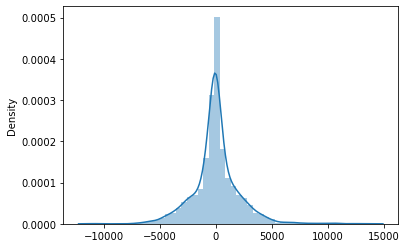

In [32]:
sns.distplot(y_test - y_pred)
plt.show()

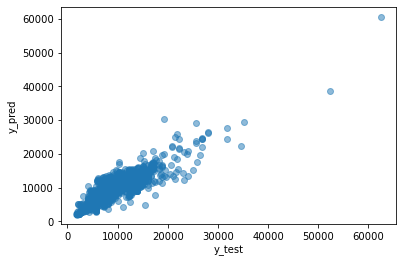

In [33]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### Save the Model

In [26]:
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [34]:
model = pickle.load(open('model.pkl','rb'))

In [35]:
print(model.score(x_test, y_test))

0.8441425860451135
